Student Details 

Name: Niall Tierney

ID: 18200044

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing #needed for scaling attributes to the interval [0,1]

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif, SelectPercentile, chi2
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# TASK 4

In [2]:
dataset1=pd.read_csv("./dataset_1.csv")
dataset1.head()


,Unnamed: 0,0,1,2
0,0,-0.331982,-0.926029,1.0
1,1,-0.819310,-0.242368,0.0
2,2,0.922427,0.499088,1.0
3,3,-0.570793,0.562286,0.0
4,4,0.375817,-0.941165,1.0


In [3]:
dataset1.drop("Unnamed: 0",axis=1,inplace=True)
dataset1.head()

,0,1,2
0,-0.331982,-0.926029,1.0
1,-0.819310,-0.242368,0.0
2,0.922427,0.499088,1.0
3,-0.570793,0.562286,0.0
4,0.375817,-0.941165,1.0


In [4]:
dataset1.describe()
#Binary target feature
#predictors are pretty similar in distribution so may be scaling is not needed here

,0,1,2
count,10001.000000,10001.000000,10001.000000
mean,0.082508,-0.004040,0.668233
std,0.615153,0.575639,0.470871
min,-0.999635,-1.400000,0.000000
25%,-0.496767,-0.496319,0.000000
50%,0.208210,-0.006960,1.000000
75%,0.614940,0.491170,1.000000
max,0.999983,0.999918,1.000000


In [5]:
predictors=dataset1.iloc[:,:2].values
target=dataset1.iloc[:,2]

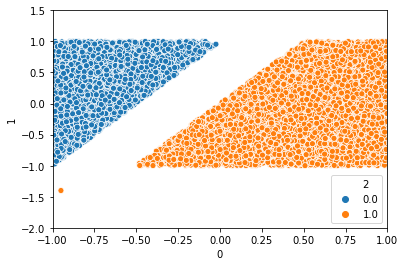

In [6]:
sns.scatterplot(x='0',y='1',hue='2',data=dataset1)
plt.xlim(-1, 1)
plt.ylim(-2, 1.5)
plt.show()
#Pretty linearly separable problem

number of support vectors for Soft-Margin: 3 for class 0 and 4 for class 1
number of support vectors for Soft-Margin: 3 for class 0 and 4 for class 1
number of support vectors for Hard-Margin: 1 for class 0 and 2 for class 1
number of support vectors for Hard-Margin: 1 for class 0 and 2 for class 1


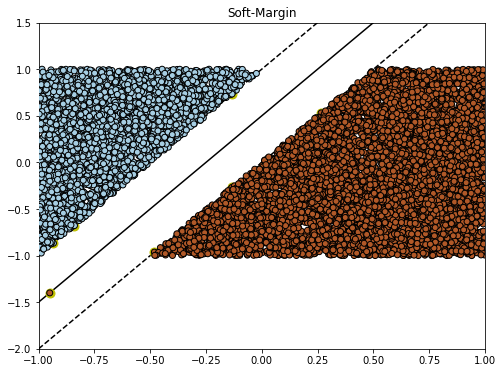

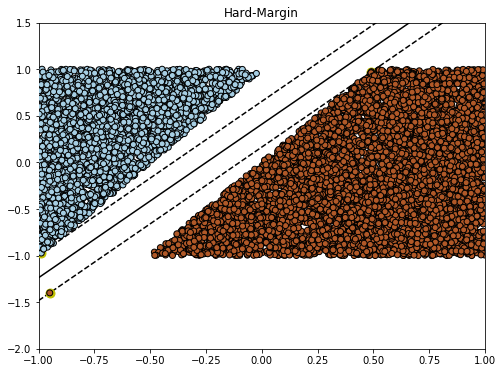

In [7]:
fignum =1

for title, regularizer in (('Soft-Margin', 10), ('Hard-Margin', 100)):
    clf = svm.SVC(kernel='linear', C=regularizer,random_state=2019)
    clf.fit(predictors, target)

    print("number of support vectors for %s: %d for class 0 and %d for class 1" %(title,clf.n_support_[0],clf.n_support_[1]))
    print("number of support vectors for %s: %d for class 0 and %d for class 1" %(title,clf.n_support_[0],clf.n_support_[1]))

 
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-1, 1)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(8, 6))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.xlim(-1, 1)
    plt.ylim(-2, 1.5)
    
    plt.title(title)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='y', zorder=10, edgecolors='y')
    plt.scatter(predictors[:, 0], predictors[:, 1], c=target, zorder=10, cmap=plt.cm.Paired,
                    edgecolors='k')

    fignum+=1
#plt.show()

As we see that we have more support vectors for soft margin svm (4+2) 6 and only (1+2) 3 support vector for the hard margin. this is due to the fact that the hard margin doesn't allow the outlier point to be misclassified so the hyperplane goes far from the points detected by soft margin and looks for the outlier.